In [1]:
%load_ext autoreload

%autoreload 2
from useful_scit.imps import *
import wrf

In [16]:
path = '/Volumes/mbProD/Downloads/wrf_cross/slices_chc_lapaz/wrfout_d04_*'

In [17]:
files = glob.glob(path)
files.sort()

In [18]:
i = 5
t = 1  
time = 'Time'
cl = 'cross_line_ll'
uv = 'u_v'
ver = 'vertical'
ws = 'wspd_wdir'
PBLH ='PBLH'
ter='ter'
TKE_PBL = 'TKE_PBL'



In [19]:
xa = xr.open_mfdataset(path,concat_dim='Time',)
# xa

In [20]:
df = xa[PBLH].to_pandas()

<xarray.DataArray 'ter' (cross_line_ll: 135)>
dask.array<shape=(135,), dtype=float32, chunksize=(135,)>
Coordinates:
  * cross_line_ll  (cross_line_ll) int64 0 1 2 3 4 5 ... 129 130 131 132 133 134
    Time           datetime64[ns] 2017-12-02
    XTIME          float32 dask.array<shape=(), chunksize=()>
Attributes:
    FieldType:    104
    description:  terrain height
    units:        m
    stagger:      
    orientation:  (70.0, 3.0) to (80.0, 137.0)

In [37]:
dt = 'day_time'
cl = 'cross_line_ll'

In [42]:
# df.drop(dt,inplace=True,axis=1)

In [72]:
d1 = pd.to_datetime('2000-01-01')
df1 = df.copy()
df1[dt] = d1 + (df1.index - (df1.index+pd.Timedelta(hours=12)).round('D'))

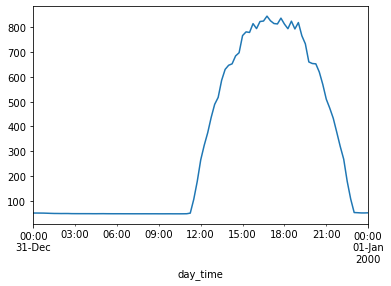

In [74]:
df1.groupby(dt).median().median(axis=1).plot()

In [90]:
nxa = df1.groupby(dt).median().stack().to_xarray()

In [94]:
nxa[cl]=nxa[cl].astype(int)

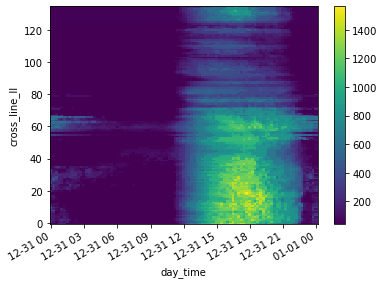

In [97]:
nxa.plot(x='day_time')

In [125]:
a1 = nxa.groupby('day_time.hour').median(dim='day_time')

In [128]:
a1[ter]=xa[ter][{time:0}]

In [132]:
a1.name=PBLH

In [135]:
a1 = a1.to_dataset()

In [137]:
a1['z']=a1[PBLH]+a1[ter]

In [138]:
a1['z']

<xarray.DataArray 'z' (hour: 24, cross_line_ll: 135)>
dask.array<shape=(24, 135), dtype=float32, chunksize=(24, 135)>
Coordinates:
  * cross_line_ll  (cross_line_ll) int64 0 1 2 3 4 5 ... 129 130 131 132 133 134
  * hour           (hour) int64 0 1 2 3 4 5 6 7 8 ... 15 16 17 18 19 20 21 22 23
    Time           datetime64[ns] 2017-12-02
    XTIME          float32 dask.array<shape=(), chunksize=()>
    ter            (cross_line_ll) float32 dask.array<shape=(135,), chunksize=(135,)>

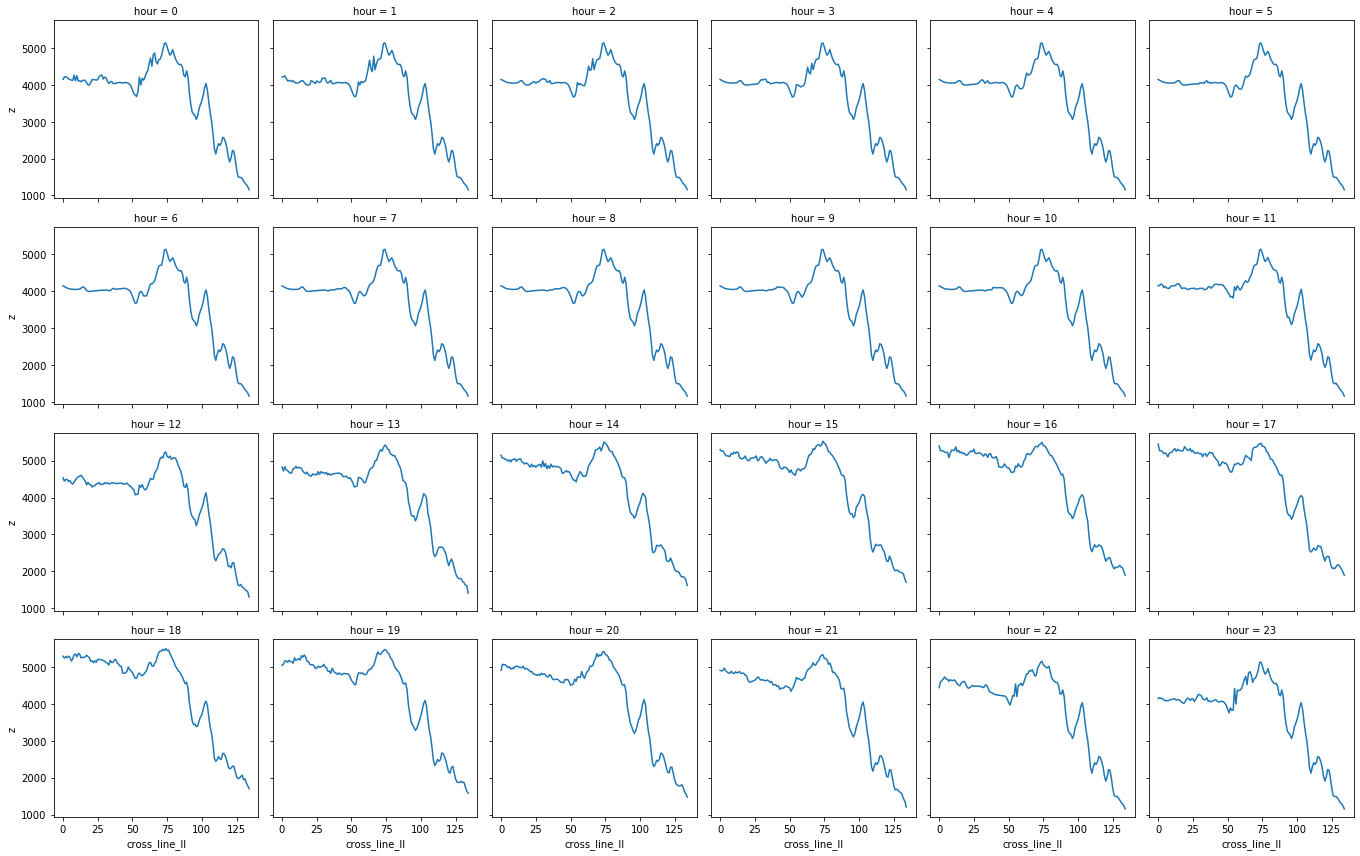

In [140]:
a1['z'].plot(col='hour',col_wrap=6)

In [111]:
nxa.day_time.to_series().index.round('H')

DatetimeIndex(['1999-12-31 00:00:00', '1999-12-31 00:00:00',
               '1999-12-31 00:00:00', '1999-12-31 01:00:00',
               '1999-12-31 01:00:00', '1999-12-31 01:00:00',
               '1999-12-31 02:00:00', '1999-12-31 02:00:00',
               '1999-12-31 02:00:00', '1999-12-31 02:00:00',
               '1999-12-31 02:00:00', '1999-12-31 03:00:00',
               '1999-12-31 03:00:00', '1999-12-31 03:00:00',
               '1999-12-31 04:00:00', '1999-12-31 04:00:00',
               '1999-12-31 04:00:00', '1999-12-31 04:00:00',
               '1999-12-31 04:00:00', '1999-12-31 05:00:00',
               '1999-12-31 05:00:00', '1999-12-31 05:00:00',
               '1999-12-31 06:00:00', '1999-12-31 06:00:00',
               '1999-12-31 06:00:00', '1999-12-31 06:00:00',
               '1999-12-31 06:00:00', '1999-12-31 07:00:00',
               '1999-12-31 07:00:00', '1999-12-31 07:00:00',
               '1999-12-31 08:00:00', '1999-12-31 08:00:00',
               '1999-12-